In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

df = pd.merge(clinical_data,mouse_data,how ="left",on="Mouse ID")

df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_mean = df.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_response = pd.DataFrame({"Tumor Volume (mm3)":tumor_vol_mean})
tumor_response.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Standard Error of Tumor Volumes Grouped by Drug and Timepoint
st_err_tumor_volume = df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
tum_vol_st_error = pd.DataFrame({"Tumor Volume (mm3)":st_err_tumor_volume})
tum_vol_st_error.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Re-Format the Data Frames
tumor_vol_mean= tumor_vol_mean.reset_index()
tumor_vol_mean_pivot = tumor_vol_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vol_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
st_err_tumor_volume= st_err_tumor_volume.reset_index()
st_err_tumor_volume_pivot = st_err_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
st_err_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


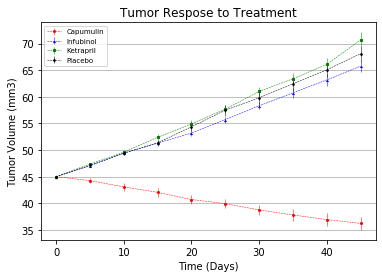

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Capomulin"], yerr=st_err_tumor_volume_pivot["Capomulin"], color="r", marker="o", markersize= 2, linestyle="dashed", linewidth=.5, label = "Capumulin")
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Infubinol"], yerr= st_err_tumor_volume_pivot["Infubinol"], color="b", marker= 6, markersize= 2, linestyle="dashed", linewidth=.5, label = "Infubinol")
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Ketapril"], yerr= st_err_tumor_volume_pivot["Ketapril"], color="g", marker="s", markersize= 2, linestyle="dashed", linewidth=.5, label = "Ketrapril")
plt.errorbar(tumor_vol_mean_pivot.index, tumor_vol_mean_pivot["Placebo"], yerr= st_err_tumor_volume_pivot["Placebo"], color="k", marker="d", markersize= 2, linestyle="dashed", linewidth=.5, label = "Placebo")
plt.title("Tumor Respose to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc = "upper left",prop = {"size":7})
plt.grid(axis = "y")
plt.savefig("analysis/fig1.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = df.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
met_response = pd.DataFrame({"Metastic Sites":met_mean})
met_response.head()


Metastic Sites
Drug      Timepoint                
Capomulin 0                0.000000
          5                0.160000
          10               0.320000
          15               0.375000
          20               0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
st_err_metast = df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
metast_st_err = pd.DataFrame({"Metastatic Sites":st_err_metast})
metast_st_err.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_mean= met_mean.reset_index()
met_mean_pivot = met_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
met_mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
st_err_metast= st_err_metast.reset_index()
st_err_metast_pivot = st_err_metast.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
st_err_metast_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


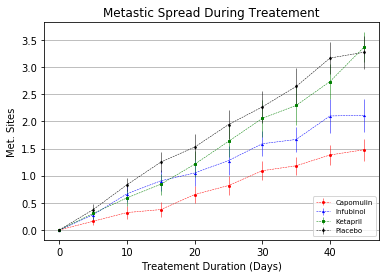

In [11]:
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Capomulin"], yerr=st_err_metast_pivot["Capomulin"], color="r", marker="o", markersize= 2, linestyle="dashed", linewidth=.5, label = "Capomulin")
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Infubinol"], yerr= st_err_metast_pivot["Infubinol"], color="b", marker= 6, markersize= 2, linestyle="dashed", linewidth=.5,label = "Infubinol")
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Ketapril"], yerr= st_err_metast_pivot["Ketapril"], color="g", marker="s", markersize= 2, linestyle="dashed", linewidth=.5, label = "Ketapril")
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Placebo"], yerr= st_err_metast_pivot["Placebo"], color="k", marker="d", markersize= 2, linestyle="dashed", linewidth=.5, label = "Placebo")
plt.title("Metastic Spread During Treatement")
plt.xlabel("Treatement Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc = "lower right",prop = {"size":7})
plt.grid(axis = "y")
plt.savefig("analysis/fig2.png")
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metri
survival_rate = df.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
survival_rate = pd.DataFrame({"Mouse Count":survival_rate})
# Preview DataFrame
survival_rate.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate= survival_rate.reset_index()
survival_rate = survival_rate.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
survival_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


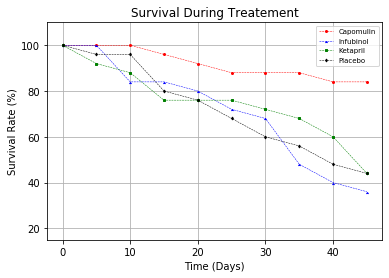

In [14]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_rate["Capomulin"] / 25, "ro", linestyle="dashed", markersize=2, linewidth=0.50, label = "Capomulin")
plt.plot(100 * survival_rate["Infubinol"] / 25, "b", marker= 6, linestyle="dashed", markersize=2, linewidth=0.50, label = "Infubinol")
plt.plot(100 * survival_rate["Ketapril"] / 25, "gs", linestyle="dashed", markersize=2, linewidth=0.50, label = "Ketapril")
plt.plot(100 * survival_rate["Placebo"] / 25, "kd", linestyle="dashed", markersize=2, linewidth=0.50,label = "Placebo")
plt.title("Survival During Treatement")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc ="upper right",prop = {"size":7})
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.ylim(15, 110)
# Save the Figure
plt.savefig("analysis/fig3.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_vol_mean_pivot.iloc[-1] - tumor_vol_mean_pivot.iloc[0]) / tumor_vol_mean_pivot.iloc[0]
# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

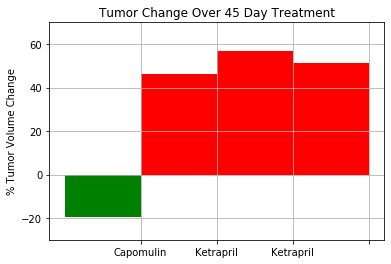

In [16]:
# Percent Changes
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])

 
fig, ax = plt.subplots()
drugs = ["Capomulin", "Infubinol","Ketrapril","Placebo"]
ind = np.arange(len(pct_changes))
width = 1 

ax.bar(drugs,ind)
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim(-30,70)
ax.set_xticks(np.arange(.5, 10, 1))
ax.grid()

# Splice data between passing and failing drugs
passing = ax.bar(ind[0], pct_changes[0], width, color='green')
failing = ax.bar(ind[1:], pct_changes[1:], width, color='red') 
        

# Use functions to label the percentages of changes
# Call functions to implement the function calls

plt.savefig("analysis/fig4.png")
plt.show()